# Census Income - Evaluation Project

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

# Loading libraries

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt                                          #for plotting and EDA
import seaborn as sns                                                    #for plotting and EDA
from sklearn.linear_model import LogisticRegression                      #classification model
from sklearn.naive_bayes import GaussianNB                               #classification model
from sklearn.tree import DecisionTreeClassifier                          #classification model
from sklearn.ensemble import RandomForestClassifier                      #classification model
from sklearn.svm import SVC                                              #classification model
from sklearn.model_selection import train_test_split                     #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                               #for checking model accuracy
from sklearn.metrics import roc_auc_score                                #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Loading the dataset
df = pd.read_csv(r'C:\Users\Asus\Desktop\dataset\sensus_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
#checking 1st 10 data
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Education_num seems to be the numeric code for Education, for instance Bachelors is 13, HS-grad is 9 and so on.

In [14]:
#checking no of rows and columns 
df.shape

(32560, 15)

In [15]:
#checking the type of data
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country are all categorical in nature, as is the case with the target variable Income.

While Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are continuous in nature.

In [16]:
#checking no of unique values
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [17]:
#Using describe function for stastistics of the dataset 
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean age is 38 and mode is 37, the age range is 17 - 90 while IQR is 28 - 48.

Education number is just encoded data for education, most of the people have max education level of some college.

For both capital gain and capital loss we can see that most of the data is around 0.

For hours per week most of the data is centered towards 40 hours per week.

# Checking and treating missing values

In [18]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values in the dataset

# EDA and Data Visualisation

In [19]:
#data visualisation 
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [20]:
#checkig columns 
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [21]:
#removing columns 

cont_cols.remove('Education_num')

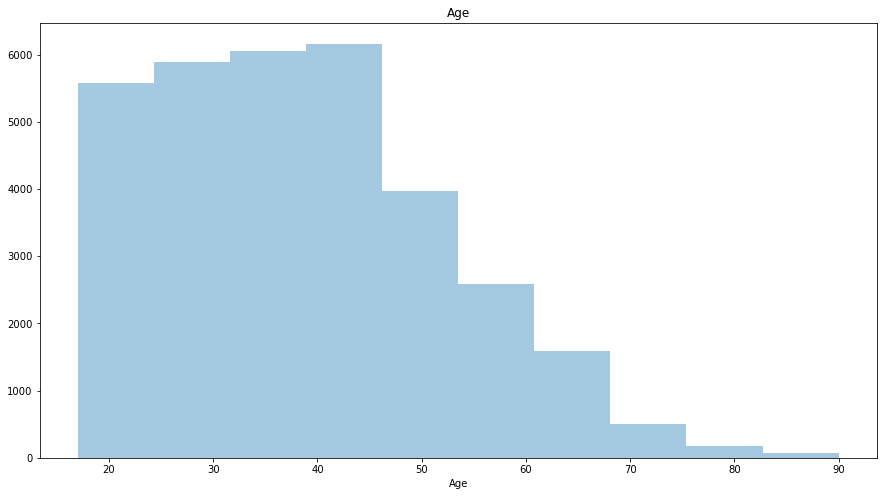

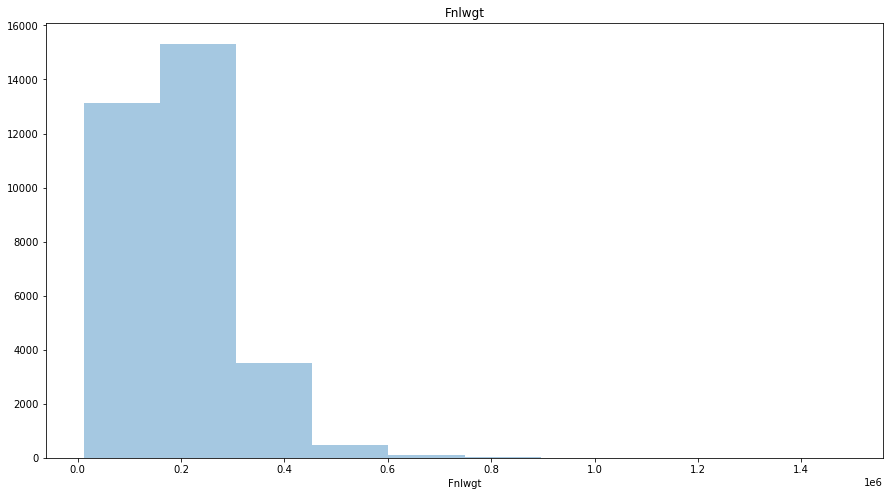

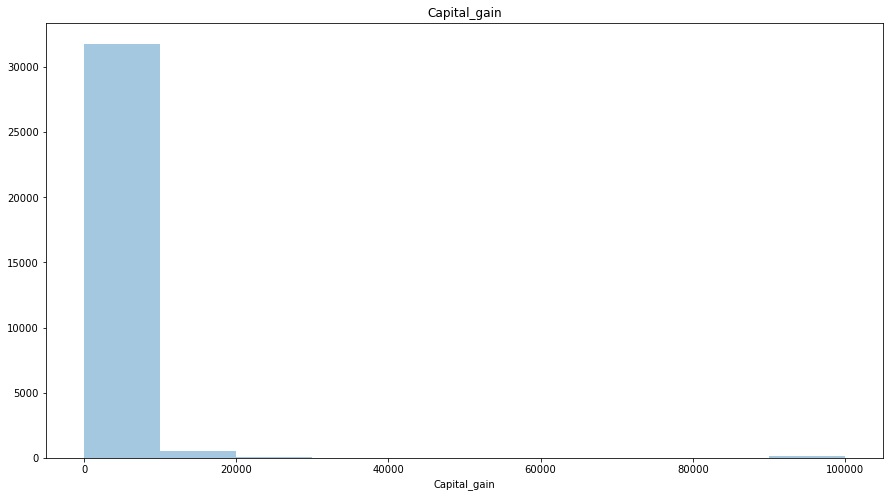

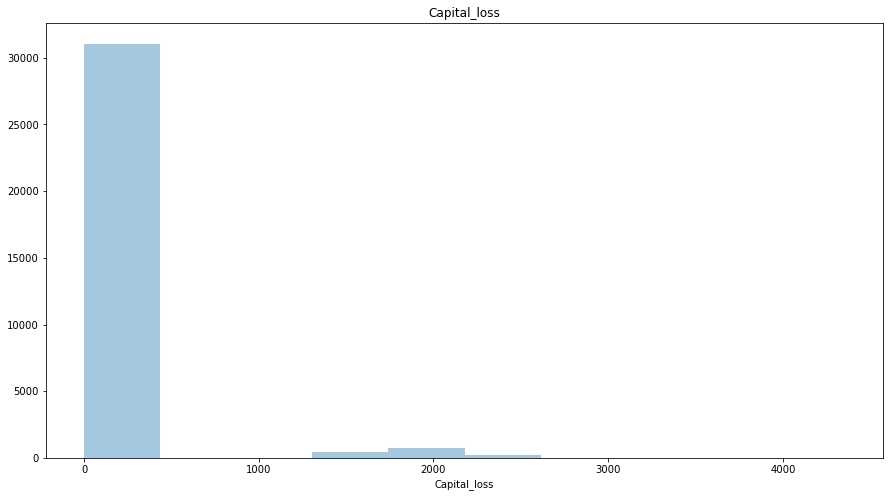

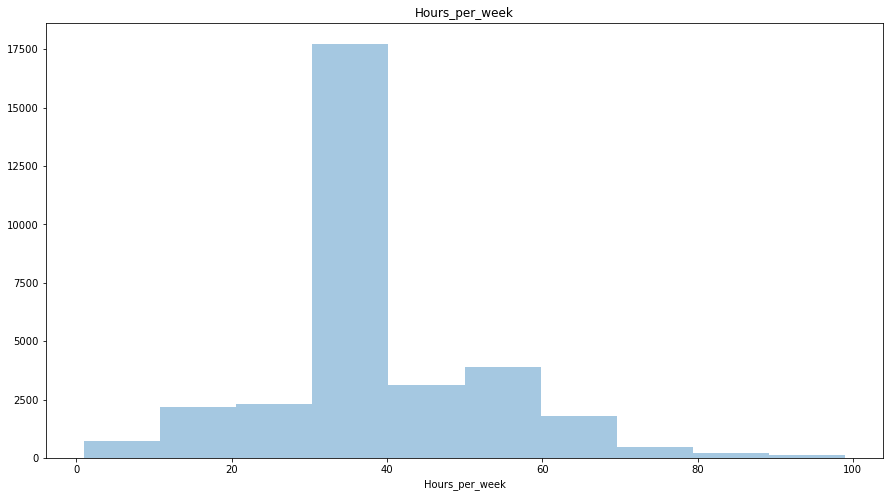

In [23]:
#univariate analysis
for i in cont_cols:                            
    plt.figure(figsize = (15, 8))
    
    #Using distplot
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

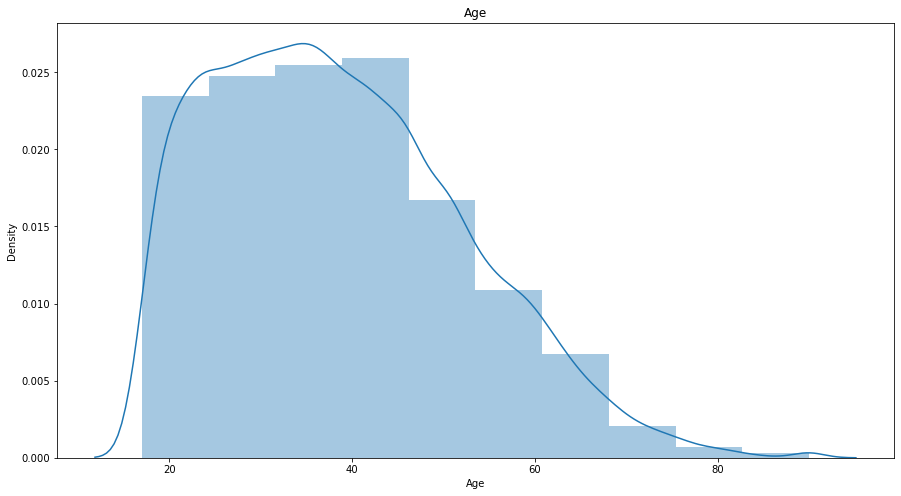

In [24]:
#using distplot
plt.figure(figsize = (15, 8))
sns.distplot(df['Age'], bins = 10)
plt.title('Age')
plt.show()

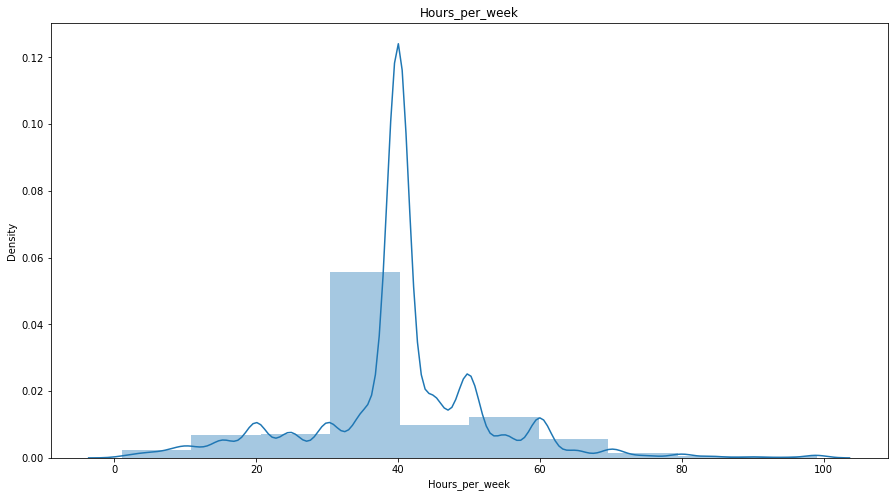

In [25]:
#using distplot
plt.figure(figsize = (15, 8))
sns.distplot(df['Hours_per_week'], bins = 10)
plt.title('Hours_per_week')
plt.show()

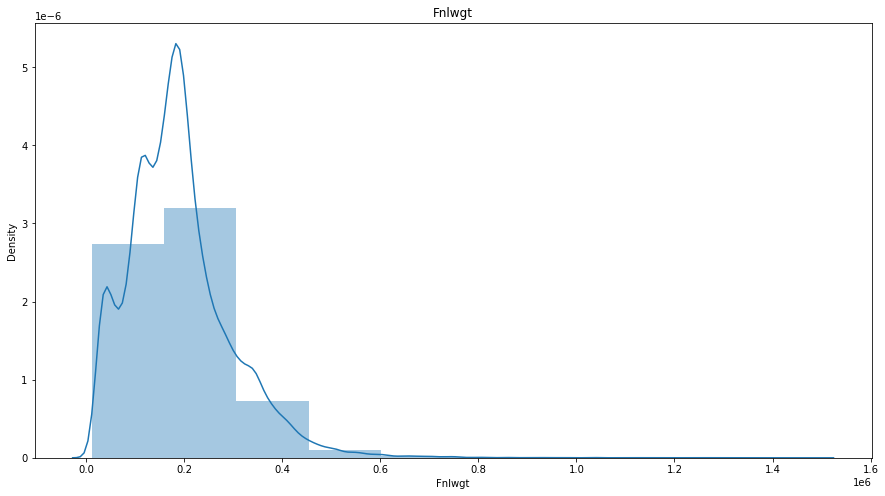

In [26]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Fnlwgt'], bins = 10)
plt.title('Fnlwgt')
plt.show()

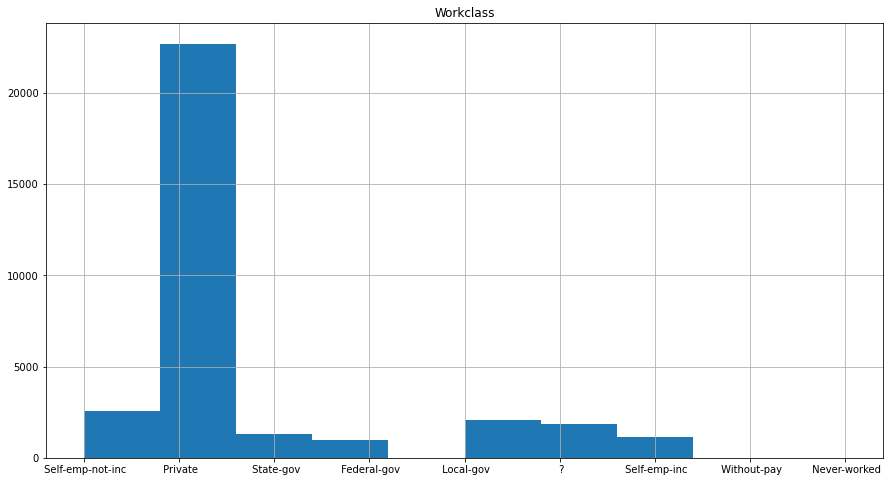

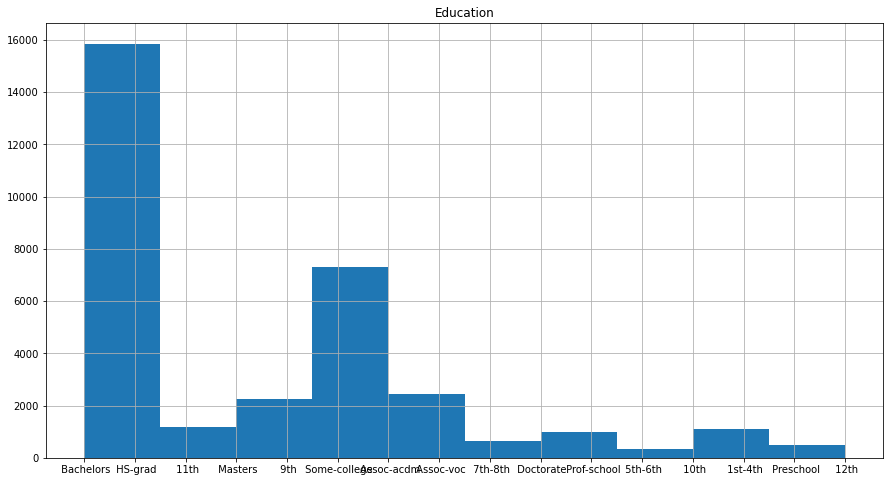

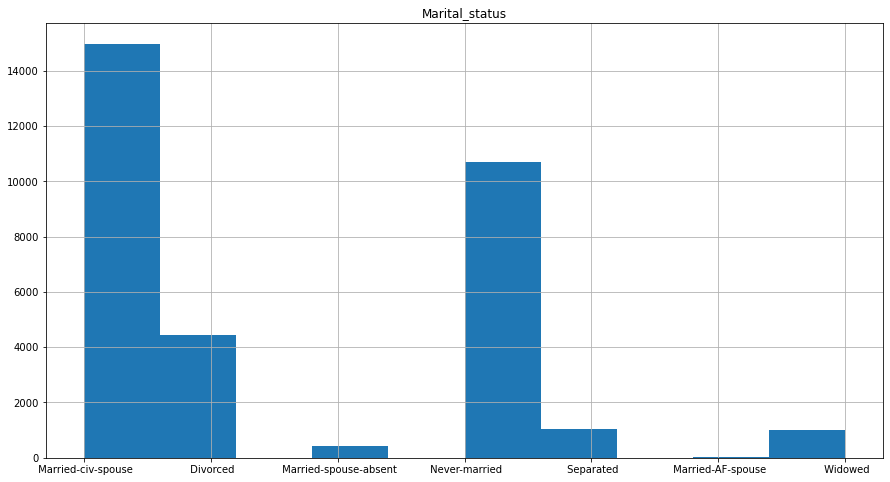

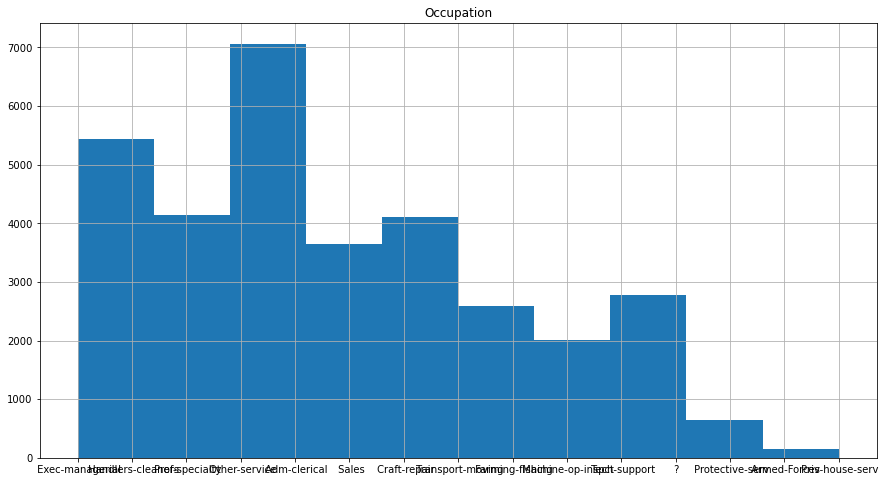

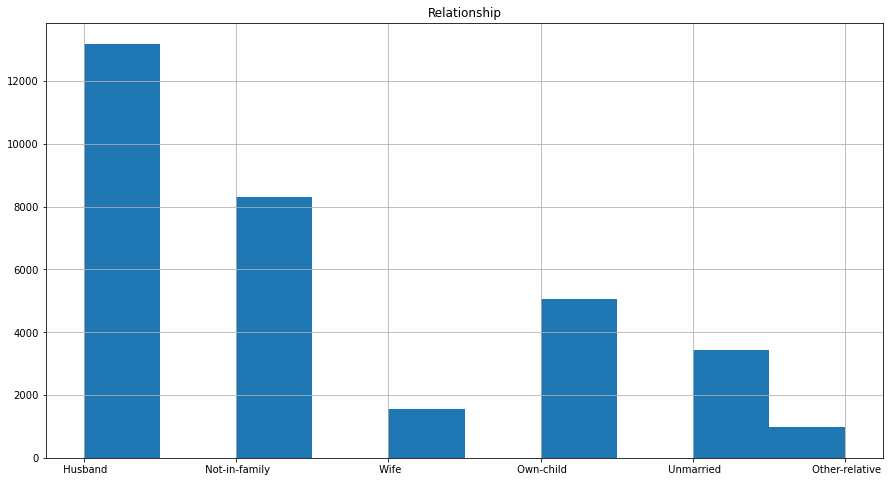

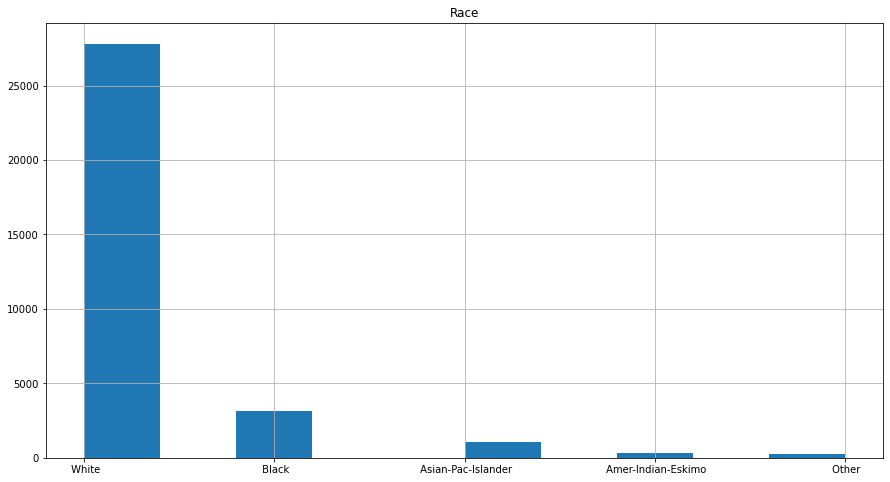

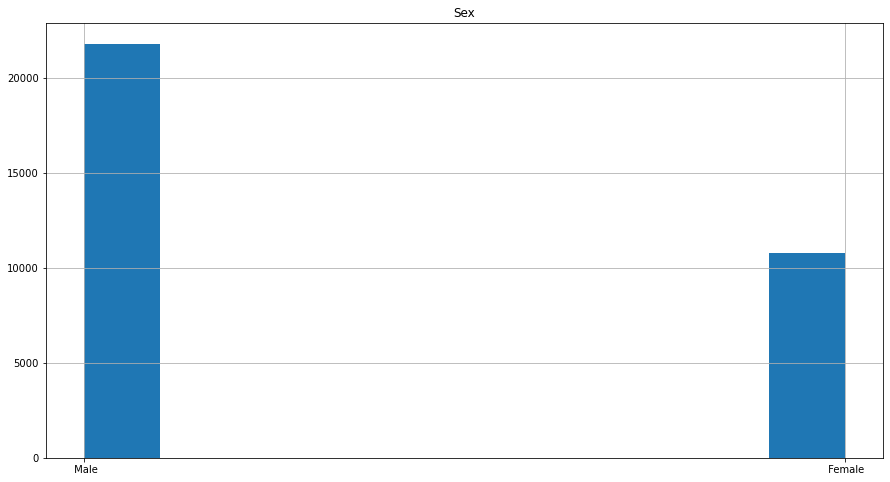

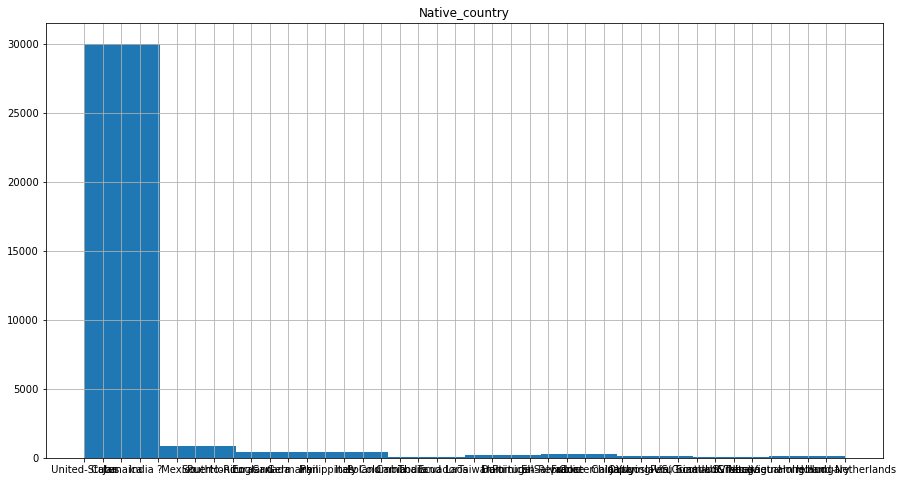

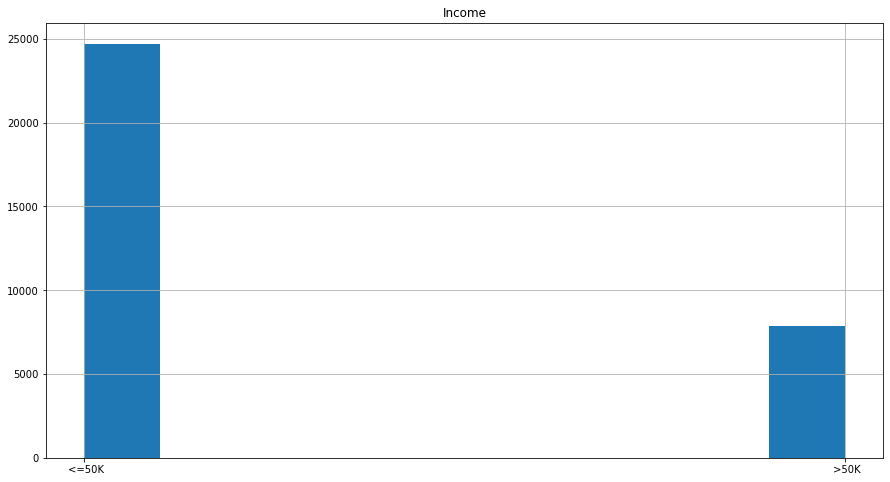

In [28]:
 #univariate analysis
for i in cate_cols:                                
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [29]:
#Using loc function to select columns 
df.loc[df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [30]:
#using loc
df.loc[df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [32]:
df.loc[(df['Workclass'] != ' ?') & (df['Occupation'] == ' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [33]:
df.loc[(df['Workclass'] == ' ?') & (df['Occupation'] == ' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


All workclass columns with ' ?' as value have occupations as ' ?', no exceptions.

Occupations with ' ?' have either ' ?' or 'Never-worked' as workclass.

Text(0.5, 1.0, 'Income Pie Chart')

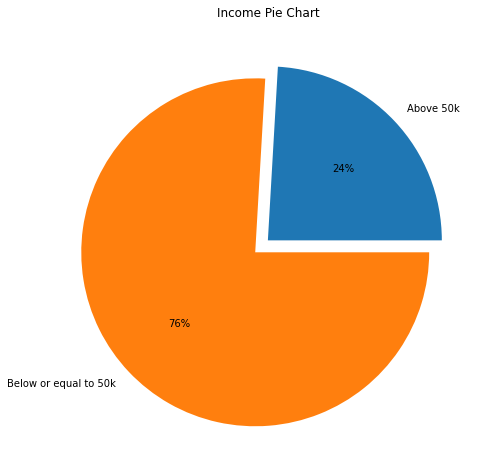

In [34]:
vals = [df['Income'][df['Income'] == ' >50K'].count() , df['Income'][df['Income'] == ' <=50K'].count()]
plt.figure(figsize = (15, 8))
label = ["Above 50k" , "Below or equal to 50k"]

#Using pie charts in this case
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Income Pie Chart")

76% of people in the given data set has income below or equal to 50k, while only 24% are earning above 50k.

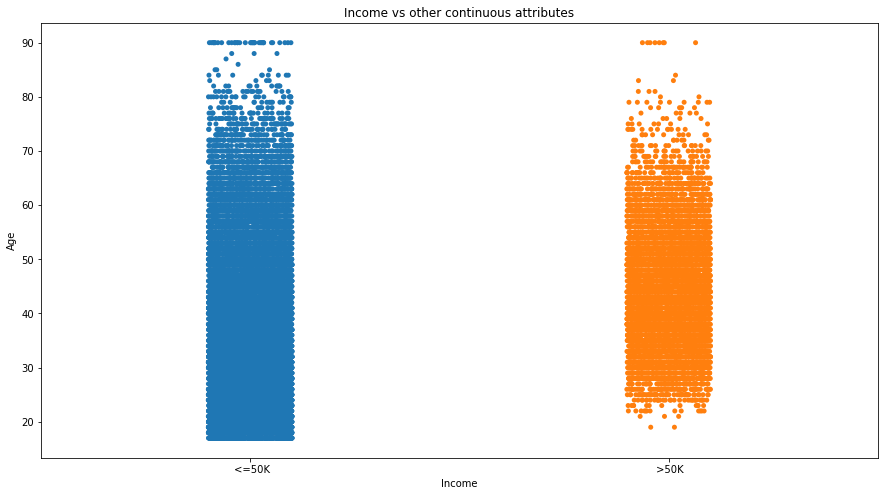

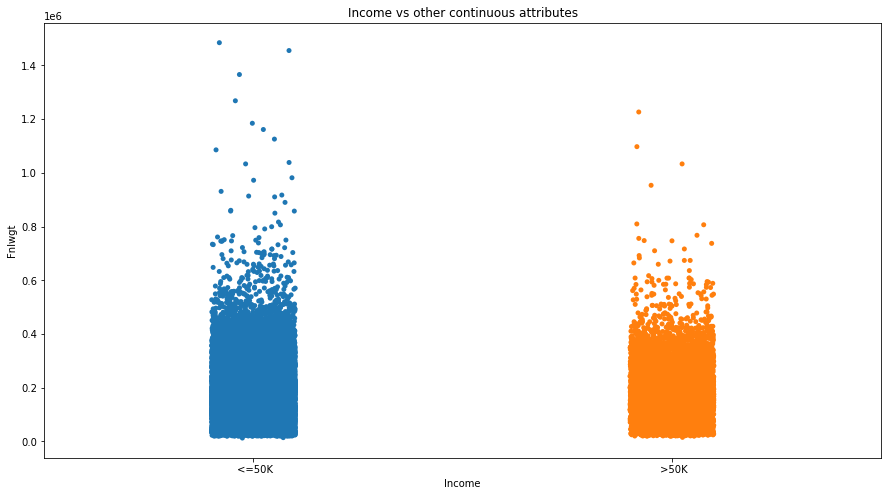

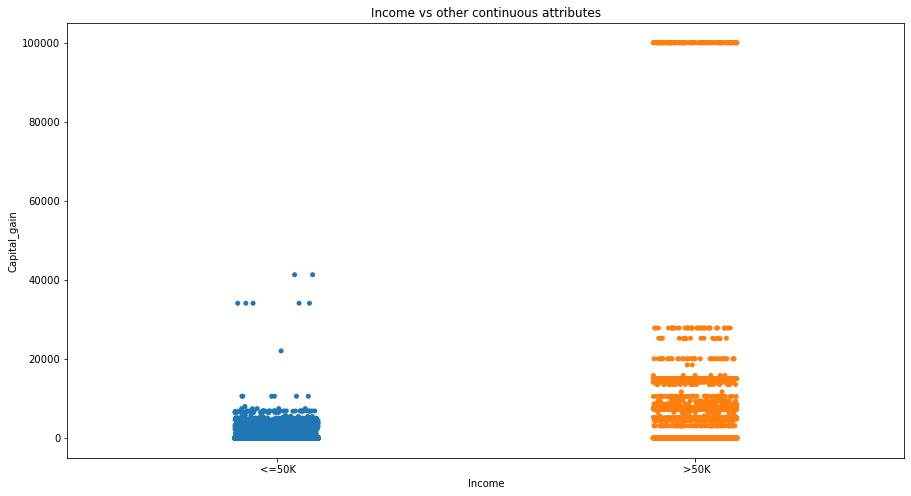

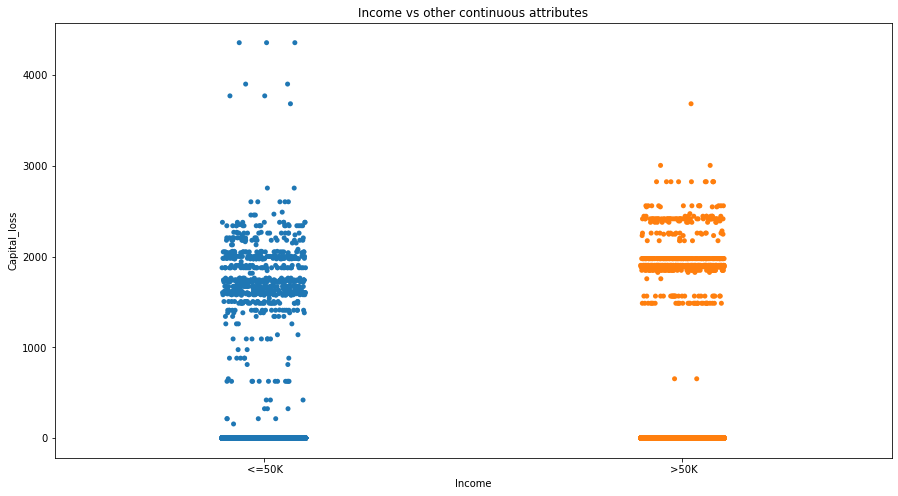

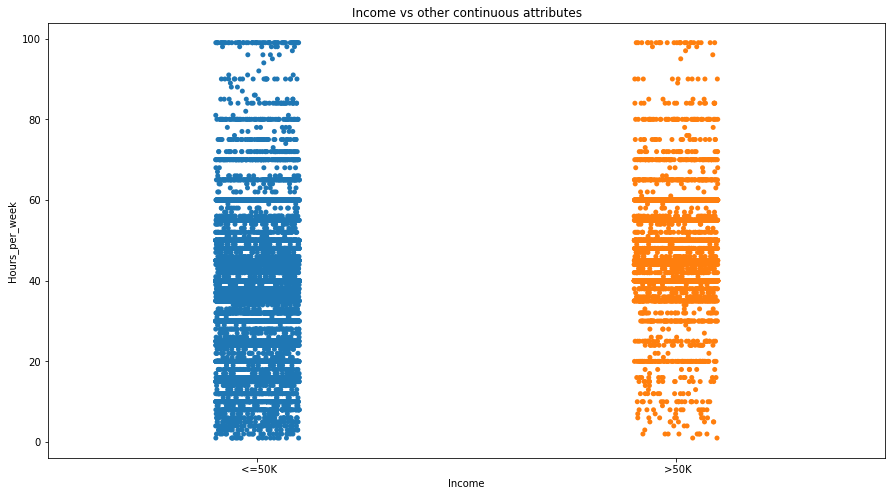

In [35]:
#bivariate analysis
for i in cont_cols:                               
    plt.figure(figsize = (15, 8))
    
#Using stripplot in this case
    ax = sns.stripplot(df['Income'], df[i])
    ax.set(xlabel = 'Income', ylabel = i)
    plt.title('Income vs other continuous attributes')
    plt.show()

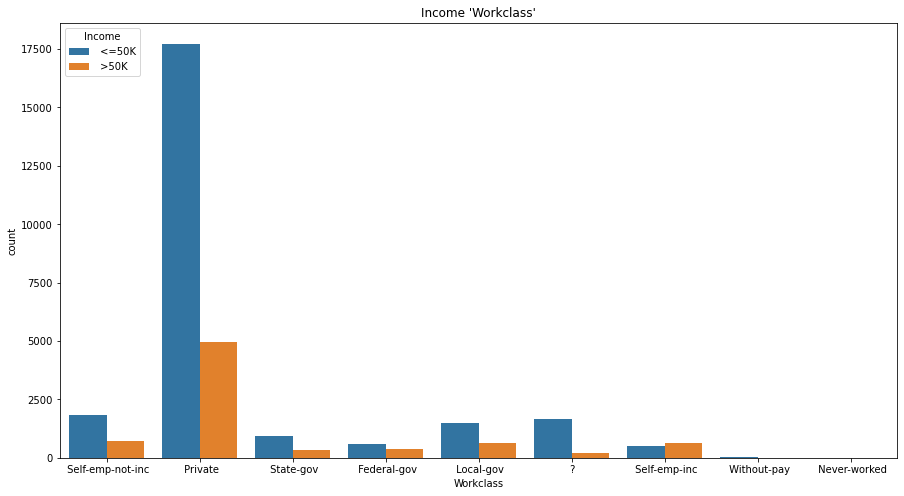

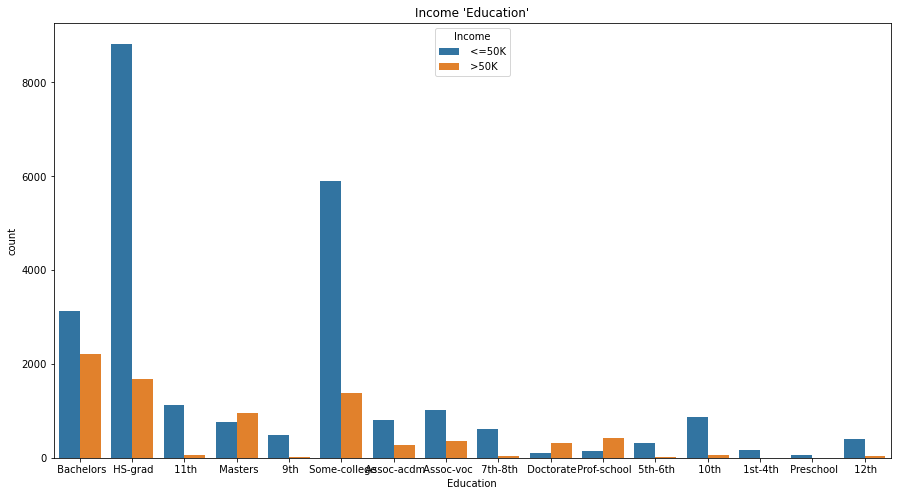

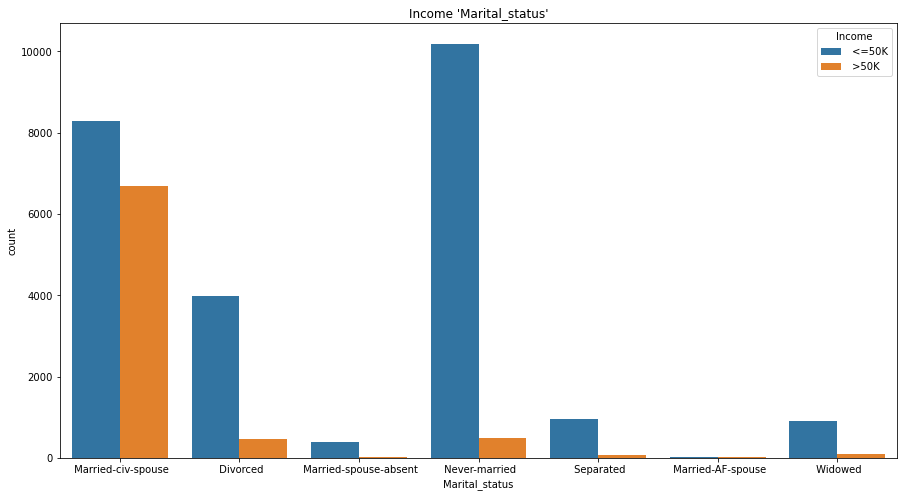

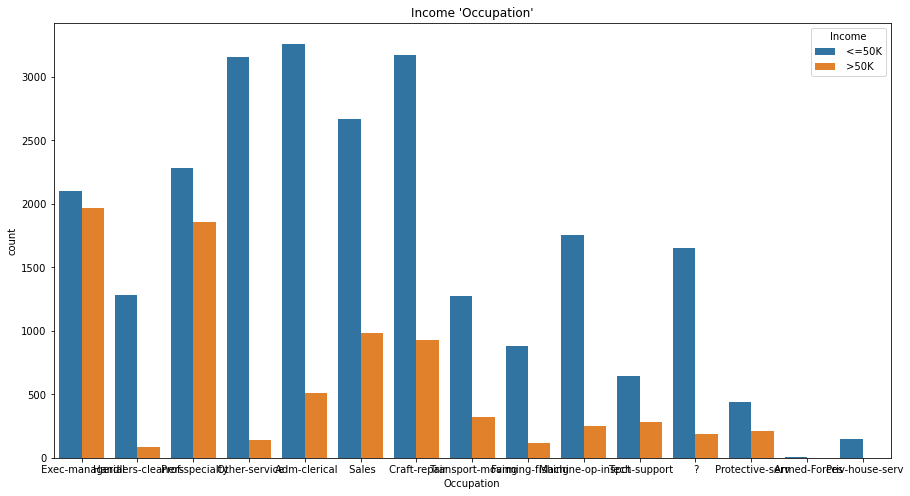

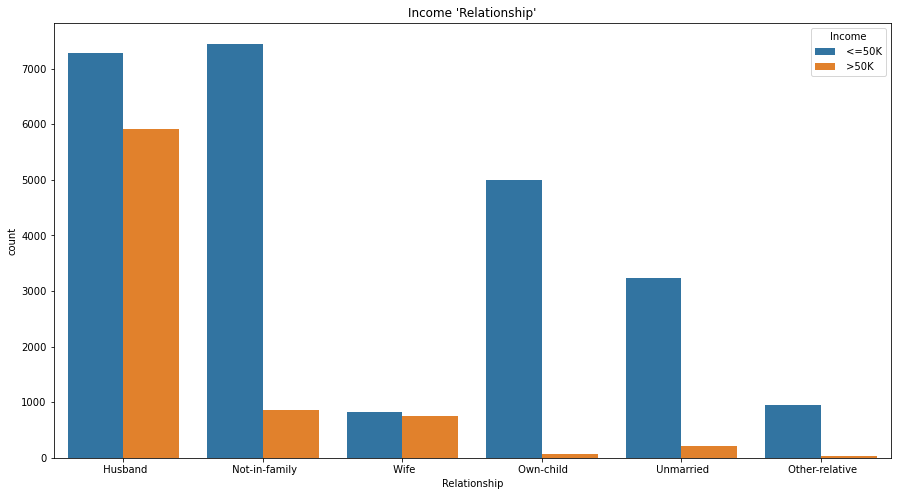

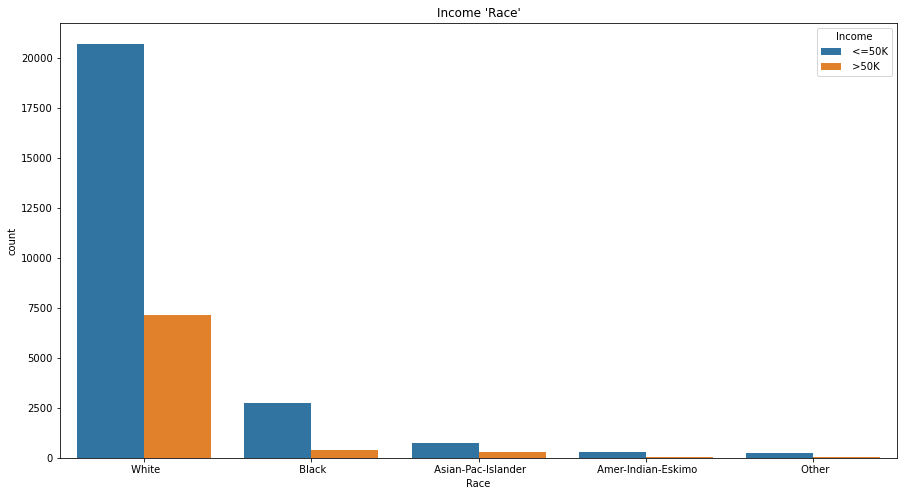

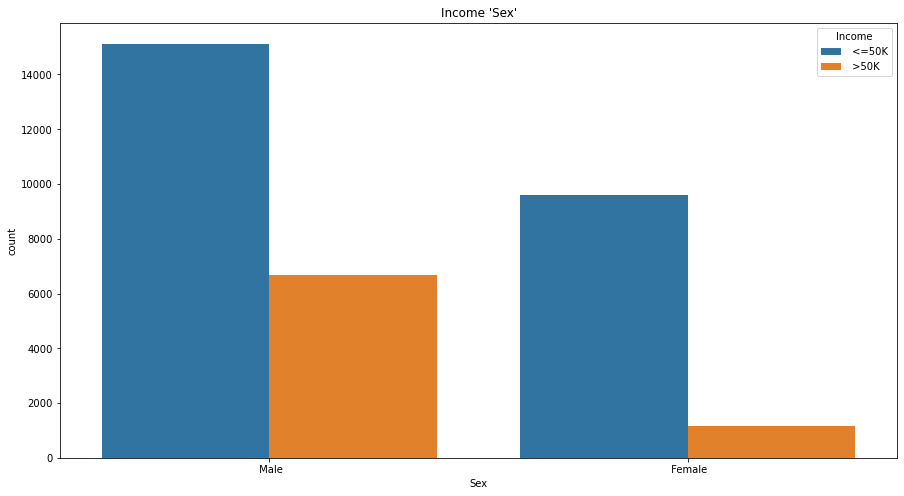

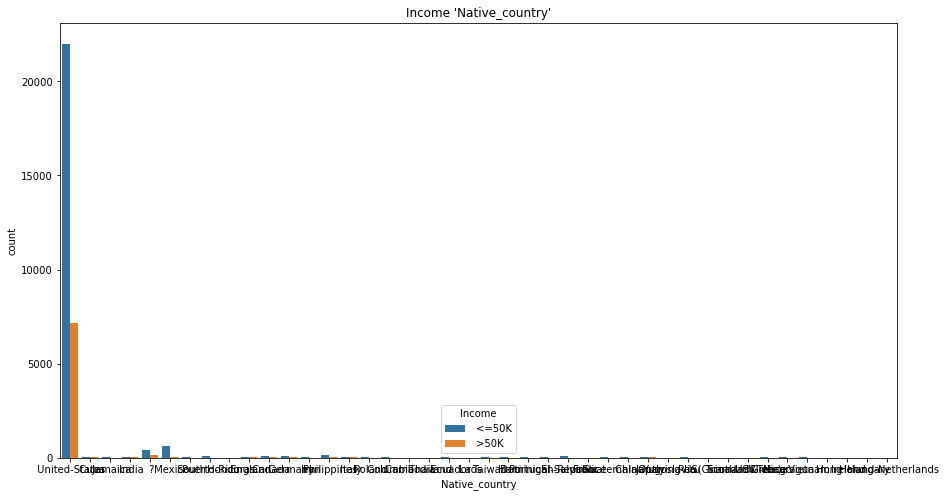

In [36]:
#bivariate analysis
for i in cate_cols[:-1]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("Income '%s'"%i)
    
    #using countplot
    sns.countplot(df[i],hue=df['Income'])

Self Employed people are the only ones in workclass column who seems to have more 50K+ earners and less <=50k earners.

While in education column, Masters, Doctorate and Prof-School are the only ones which have more 50k+ earners and less <=50k earners.

People who are married irrespective of Relationship (Husband or Wife) seems to have higher chance of earning over 50k.

In [37]:
#using replace function 
df['Income'].replace(' <=50K', 0, inplace = True)
df['Income'].replace(' >50K', 1, inplace = True)

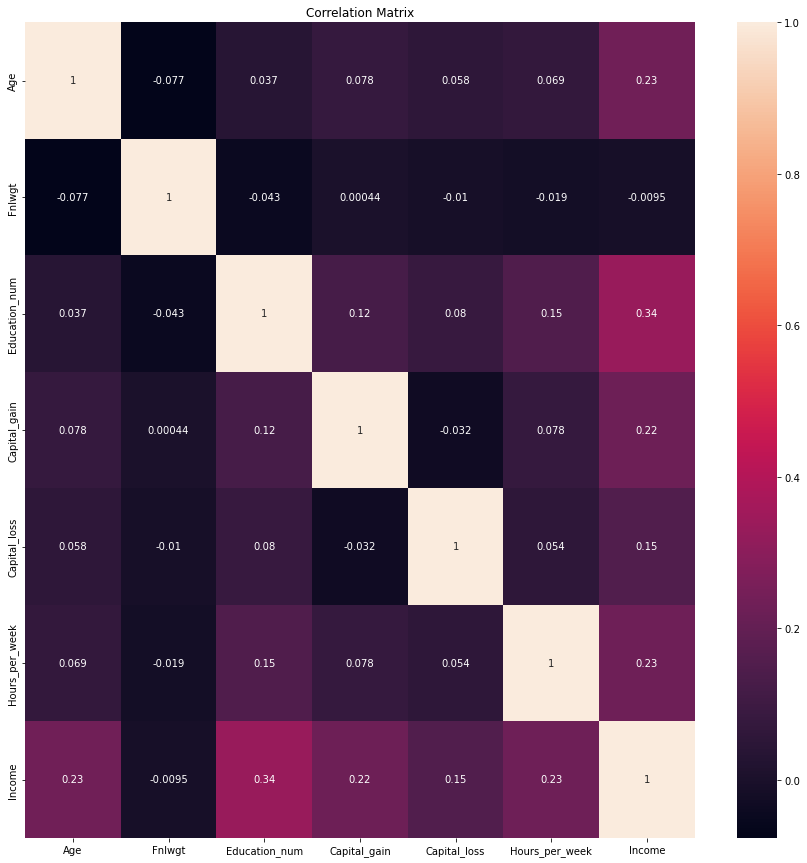

In [38]:
#displaying the data using heatmap
plt.figure(figsize = [15, 15]) 
#multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Education seems to be most correlated with Income (0.34), apart from that Age, Hours_per_week and Capital_gain are also very much correlated with Income at 0.23, 0.23 and 0.22 respectively.

Final Weight seems to be least correlated with Income at -0.01.

# Outliers and Skewness

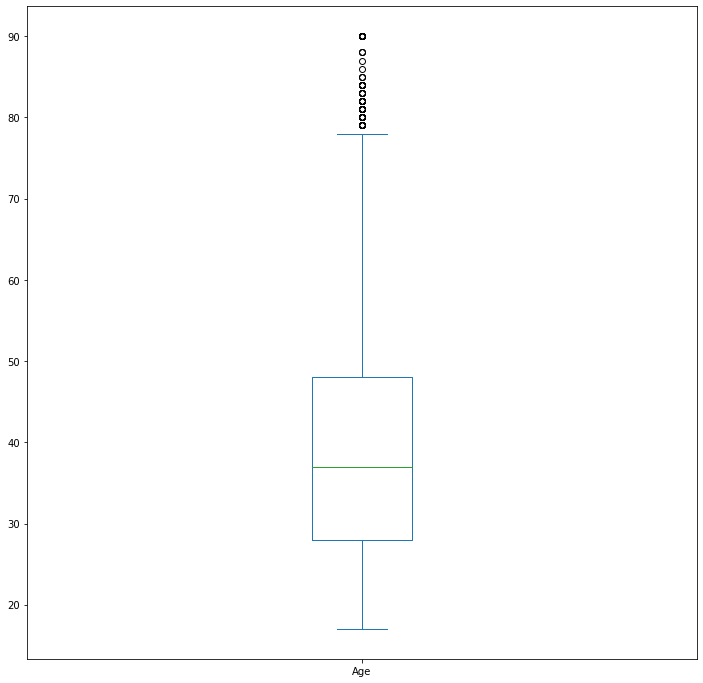

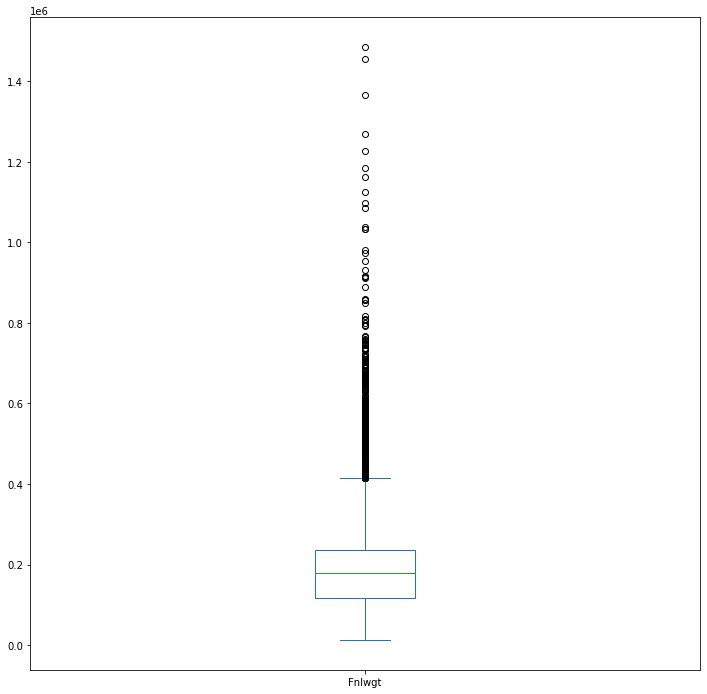

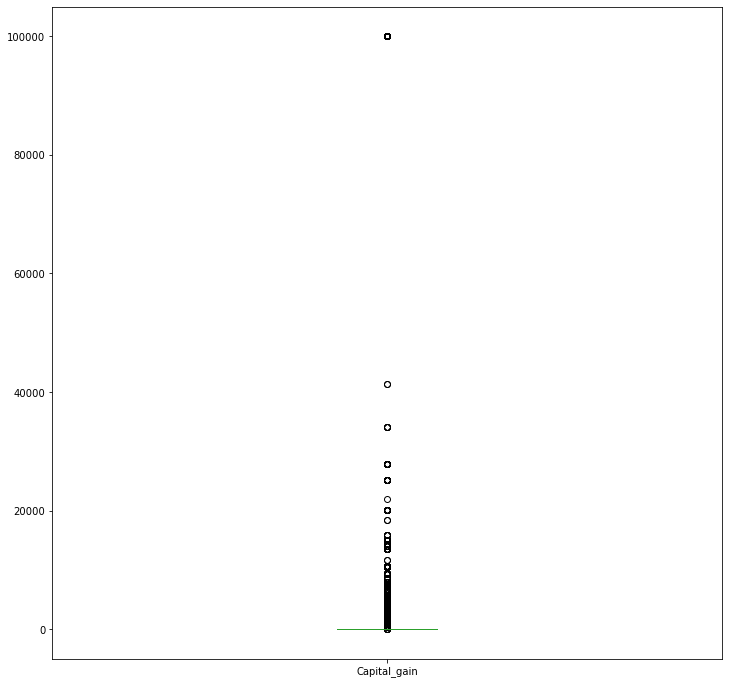

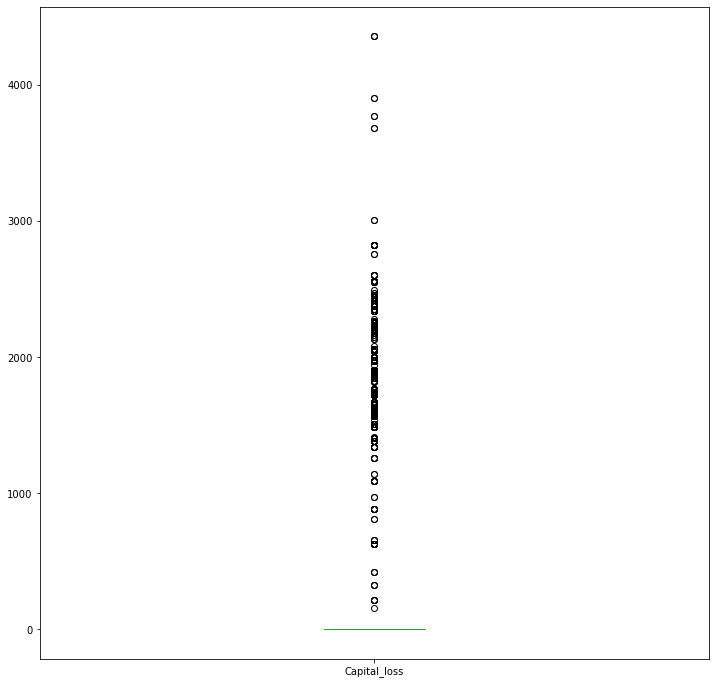

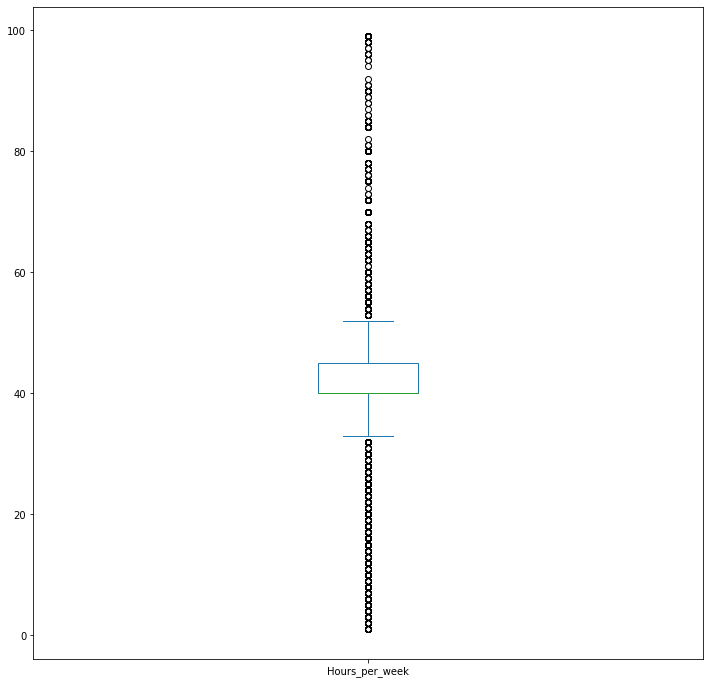

In [39]:
for i in cont_cols:
    plt.figure(figsize = (12, 12))
    df[i].plot.box()

In [40]:
#Checking skewness
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [41]:
#removing columns 
cont_cols.remove('Age')
cont_cols.remove('Hours_per_week')

In [42]:
#assigning variables 
df_new = df

In [43]:
#removing skewness

#importing libraries
from sklearn.preprocessing import power_transform  
df_new[cont_cols] = power_transform(df[cont_cols], method='yeo-johnson') 

#using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df.columns)

In [44]:
#checking the dataset
df_new.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Income            1.212383
dtype: float64

Skewness has been reduced significantly, even though it is still very high.

In [45]:
s = (df.dtypes == 'object')
obj_cols = list(s[s].index)

print("Categorical variables:")
print(obj_cols)

Categorical variables:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [46]:
#removing columns 
obj_cols.remove('Education')

In [48]:
from sklearn.preprocessing import LabelEncoder

#USING LABELENCODER
label_encoder = LabelEncoder()
for col in obj_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

Label Encoded all the object columns, except for Education since we already have a column in the dataset for its encoded value.

In [49]:
#dropping columns 
df_new = df_new.drop('Education', axis = 1)

Dropping Education column since Education_num is already present in dataset.

In [50]:
x = df_new.drop('Income', axis = 1)
y = df_new['Income']

# Creating Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 448)
#applying train split

In [52]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.8252457002457002
[[7025  489]
 [1218 1036]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7514
           1       0.68      0.46      0.55      2254

    accuracy                           0.83      9768
   macro avg       0.77      0.70      0.72      9768
weighted avg       0.81      0.83      0.81      9768

GaussianNB()
0.8156224406224406
[[6655  859]
 [ 942 1312]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7514
           1       0.60      0.58      0.59      2254

    accuracy                           0.82      9768
   macro avg       0.74      0.73      0.74      9768
weighted avg       0.81      0.82      0.81      9768

DecisionTreeClassifier()
0.8064086814086814
[[6514 1000]
 [ 891 1363]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7514
           1       0.58      0.60      0

All models have very low difference between accuracy score and cross val score, hence we will Random Forest Model since its accuracy is highest.

# Hypertuning

In [58]:
#importing required libraries
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [60]:
#using randomforestclassifier
rfc1=RandomForestClassifier(random_state=448, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8604627354627354
[[7196  318]
 [1045 1209]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7514
           1       0.79      0.54      0.64      2254

    accuracy                           0.86      9768
   macro avg       0.83      0.75      0.78      9768
weighted avg       0.85      0.86      0.85      9768



In [61]:
#cross validation score
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=448)  model is : 0.8513513513513512


There wasn't much improve in accuracy and cross validation score after gridsearchcv.

In [62]:
#using pickle
import pickle

filename = 'CensusIncomeRfc.pkl'
pickle.dump(rfc1, open(filename, 'wb'))

In [64]:
loaded_model = pickle.load(open('CensusIncomeRfc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8604627354627354


In [65]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfc1[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
